In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats


PATH = '/content/drive/Shareddrives/RABBIT/Dataset/'
JW_PATH = '/content/drive/Shareddrives/RABBIT/Dataset/Data_analysis/processed_data_JW'
PLOT_PATH = '/content/drive/Shareddrives/RABBIT/Dataset/Data_analysis/Data_analysis_JW/midterm_organized_code/Plot'
RESULT_PATH = '/content/drive/Shareddrives/RABBIT/Dataset/Data_analysis/Data_analysis_JW/midterm_organized_code/Result'

Mounted at /content/drive


# Whole Process

1. Read the crime denisty data, which Daye calculated, considering population
2. Read the Urban factor data and extract 2018 data. 
3. Apply KDE to the Urban factor data
4. Plot the meshgrid function about the urban factors
5. Calculate the correlation and plot of it. 

# 1. Read the crime denisty data, which Daye calculated, considering population.

# 2. Read urban factor data and extract 2018 data for urban factor data

In [ ]:
YEAR = '2018'

crime_density = np.load(os.path.join(JW_PATH,'violent_population_crime_Fvalue.pkl'),allow_pickle=True)
# Read Data
bus_station_data = pd.read_csv(os.path.join(PATH,'Safety/1. Chicago CTA_BusStops.csv')) # data num: 92
police_station_data = pd.read_csv(os.path.join(PATH,'Safety/2. Chicago Police_Stations.csv')) # data num: 92
fire_station_data = pd.read_csv(os.path.join(PATH,'Safety/3. Chicago Fire_Stations.csv')) # data num: 92
library_data = pd.read_csv(os.path.join(PATH,'Safety/4. Chicago Libraries.csv')) # data num: 81
vacant_data = pd.read_csv(os.path.join(PATH,'Safety/5. Chicago Vacant and Abandoned Buildings (Service Request).csv')) #65,119
family_support_data = pd.read_csv(os.path.join(PATH,'Safety/6. Chicago Family and Support Services Delegate Agencies.csv')) #1,354
light_out_data = pd.read_csv(os.path.join(PATH,'Safety/7. Chicago Street Lights All Out (Service Request, No Duplicates).csv')) #147,013
sanitation_data = pd.read_csv(os.path.join(PATH,'Safety/8. Chicago Sanitation Code Complaints (Service Request).csv')) #152,664
graffiti_data = pd.read_csv(os.path.join(PATH,'Safety/9. Chicago Graffiti Removal (Service Request, No Duplicates).csv')) #963,936 
public_school_data = pd.read_csv(os.path.join(PATH,'Safety/10. Chicago_Public_Schools_-_School_Profile_Information_SY2122.csv')) #655
shotspotter_data = pd.read_csv(os.path.join(PATH,'Safety/12. Chicago Shotspotter Alerts.csv')) #141,295

#Remove Nan
vacant_data.drop(vacant_data[pd.isna(vacant_data['Location'])].index,inplace=True)
family_support_data.drop(family_support_data[pd.isna(family_support_data['Location'])].index,inplace=True)
light_out_data.drop(light_out_data[pd.isna(light_out_data['Location'])].index,inplace=True)
sanitation_data.drop(sanitation_data[pd.isna(sanitation_data['Location'])].index, inplace=True)
graffiti_data.drop(graffiti_data[pd.isna(graffiti_data['Location'])].index, inplace=True)
shotspotter_data.drop(shotspotter_data[pd.isna(shotspotter_data['LOCATION'])].index, inplace=True)

#Extract 2018 data.
vacant_data = vacant_data[vacant_data['DATE SERVICE REQUEST WAS RECEIVED'].str.contains(YEAR)]
light_out_data = light_out_data[light_out_data['Creation Date'].str.contains(YEAR)]
sanitation_data = sanitation_data[sanitation_data['Creation Date'].str.contains(YEAR)]
graffiti_data = graffiti_data[graffiti_data['Creation Date'].str.contains(YEAR)]

'''
Police Station
Bus Station
Firestation
Library
family support
public school data
'''

# Bus 
bus_station_location = bus_station_data['the_geom']
bus_station_location = bus_station_location.dropna()
bus_station_location_list = []
for item in bus_station_location.str[7:-1]:
  bus_station_location_list.append(item.split(' '))
bus_station_location = pd.DataFrame(bus_station_location_list)
bus_station_location.columns = ['longitude','latitude']
bus_station_location = bus_station_location.astype('float')

# Police
police_station_location = police_station_data[['LONGITUDE','LATITUDE']]
police_station_location.columns = ['longitude','latitude']
public_school_location = police_station_location.dropna()

# Firestation
fire_station_location = fire_station_data['COORDINATE']
fire_station_location = fire_station_location.dropna()
fire_station_location_list = []
for item in fire_station_location.str[1:-1]:
  fire_station_location_list.append(item.split(','))
fire_station_location = pd.DataFrame(fire_station_location_list)
fire_station_location.columns = ['latitude','longitude']
fire_station_location = fire_station_location.astype('float')

#Library
library_location = library_data['LOCATION']
library_location = library_location.dropna()
library_location_list = []
for item in library_location.str[1:-1]:
  library_location_list.append(item.split(','))
library_location = pd.DataFrame(library_location_list)
library_location.columns = ['latitude','longitude']
library_location = library_location.astype('float')

#Schools
public_school_location = public_school_data[['School_Longitude','School_Latitude']]
public_school_location.columns = ['longitude','latitude']
public_school_location = public_school_location.dropna()

#Family support
family_support_location = family_support_data[['Latitude','Longitude']]
family_support_location.columns = ['latitude','longitude']
family_support_location

#Vacant data
vacant_data_location = pd.DataFrame(vacant_data['Location'].str[1:-1].str.split(',').to_list(),columns=['latitude','longitude'])
vacant_data_location = vacant_data_location.astype('float')

#light
light_out_data_location = pd.DataFrame(light_out_data['Location'].str[1:-1].str.split(',').to_list(),columns=['latitude','longitude'])
light_out_data_location = light_out_data_location.astype('float')

#Sanitation
sanitation_data_location = pd.DataFrame(sanitation_data['Location'].str[1:-1].str.split(',').to_list(),columns=['latitude','longitude'])
sanitation_data_location = sanitation_data_location.astype('float')

#graffiti
graffiti_data_location = pd.DataFrame(graffiti_data['Location'].str[1:-1].str.split(',').to_list(),columns=['latitude','longitude'])
graffiti_data_location = graffiti_data_location.astype('float')

#shotspotter
shotspotter_data_location = pd.DataFrame(shotspotter_data['LOCATION'].str[7:-1].str.split(' ').to_list(),columns=['longitude','latitude'])
shotspotter_data_location = shotspotter_data_location.astype('float')

# 3. Apply KDE to the Urban factor data
# 4. Plot the meshgrid function about the urban factors


bus


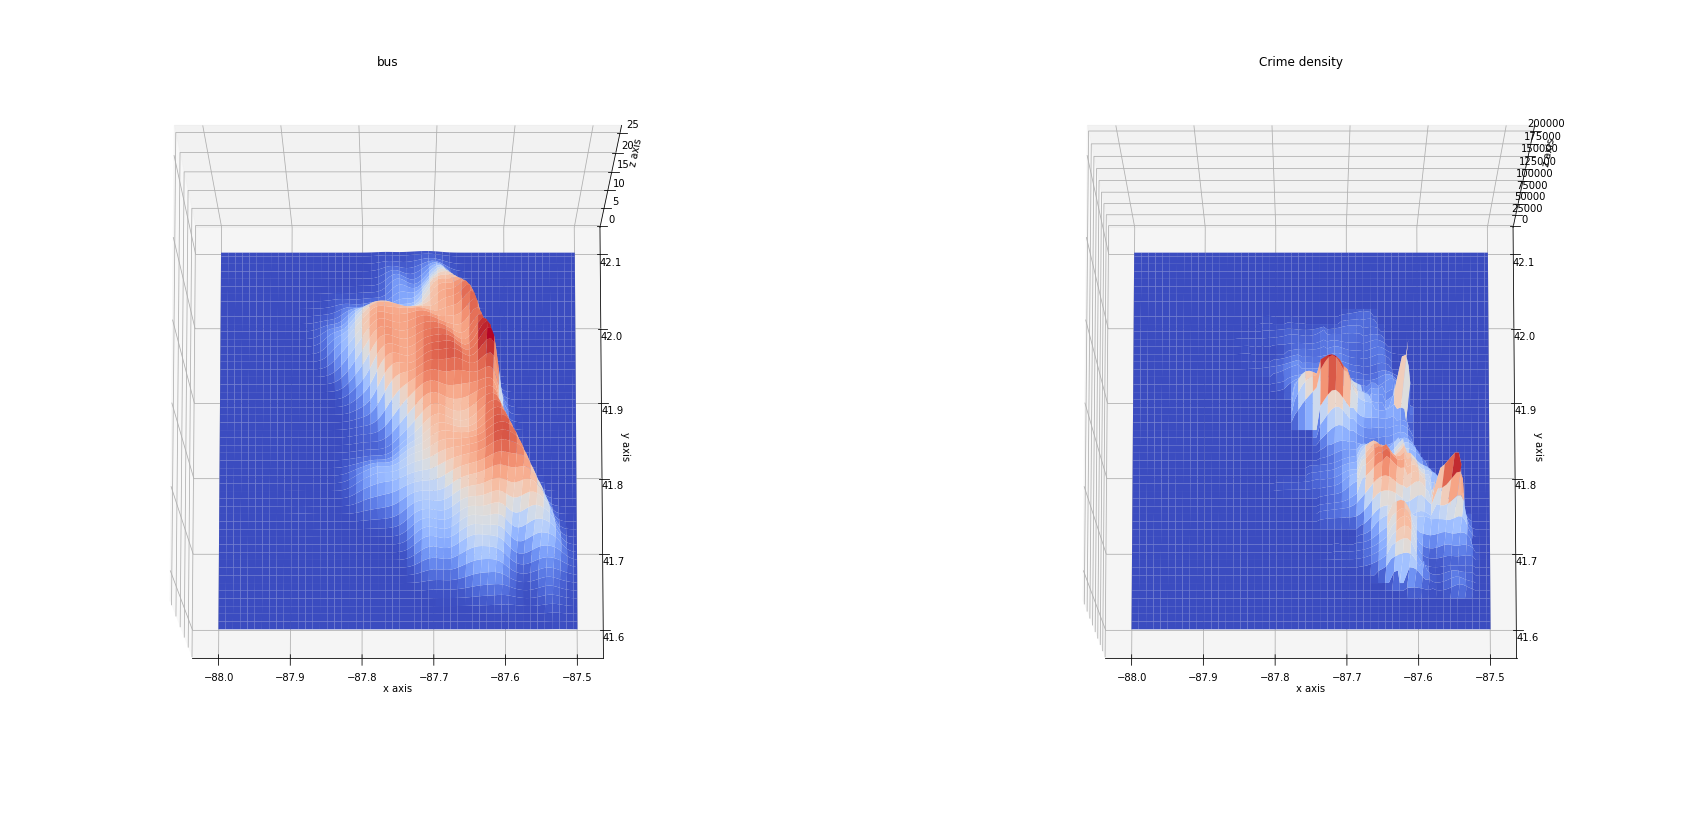

police_station


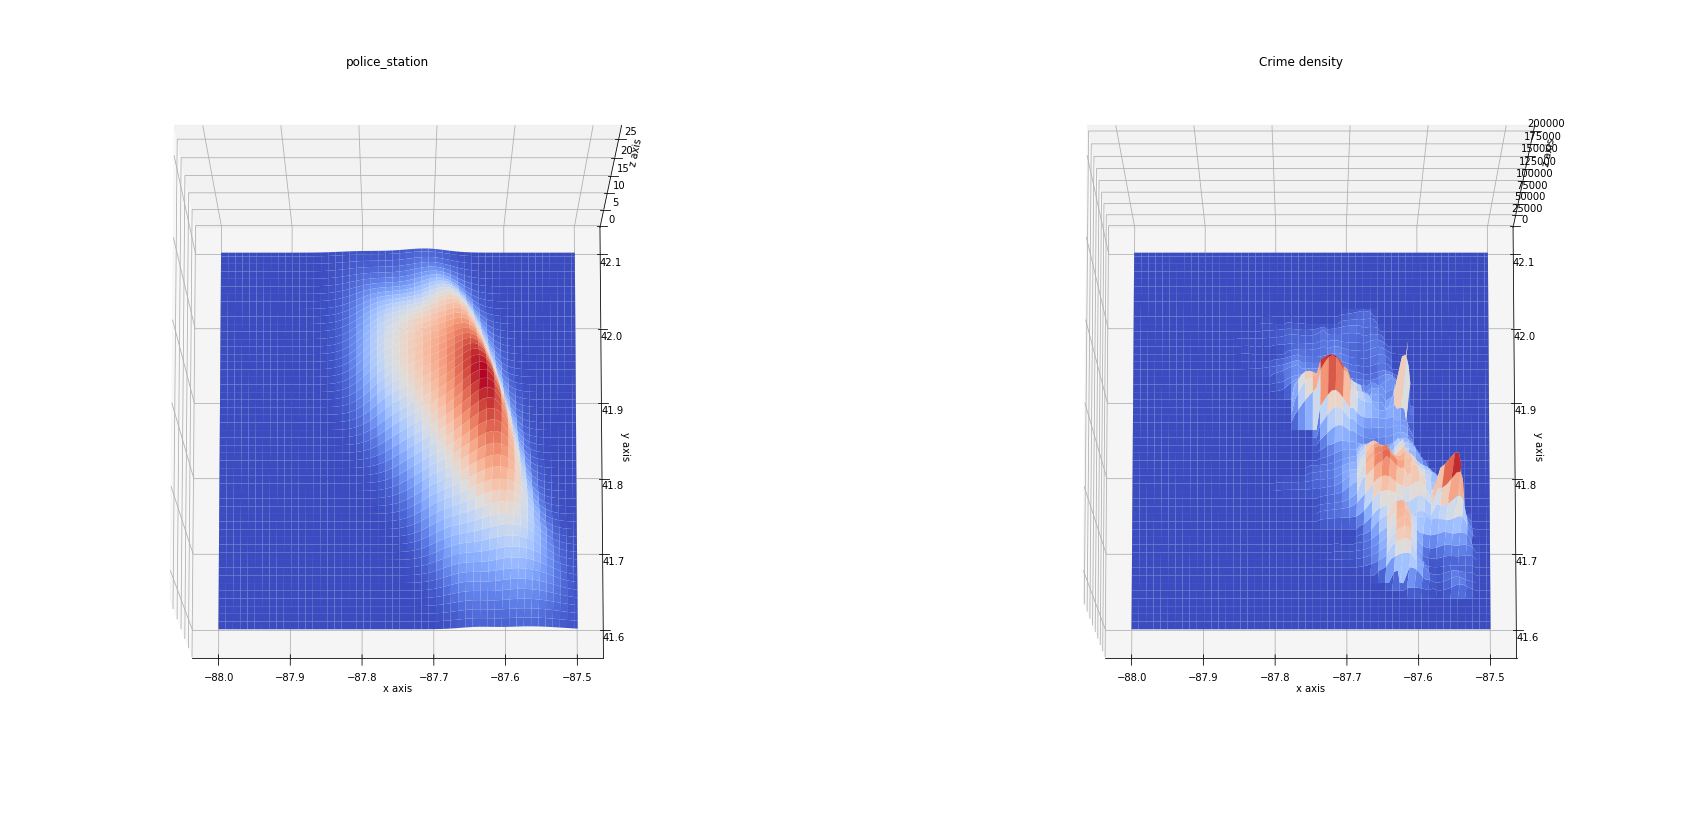

fire_station


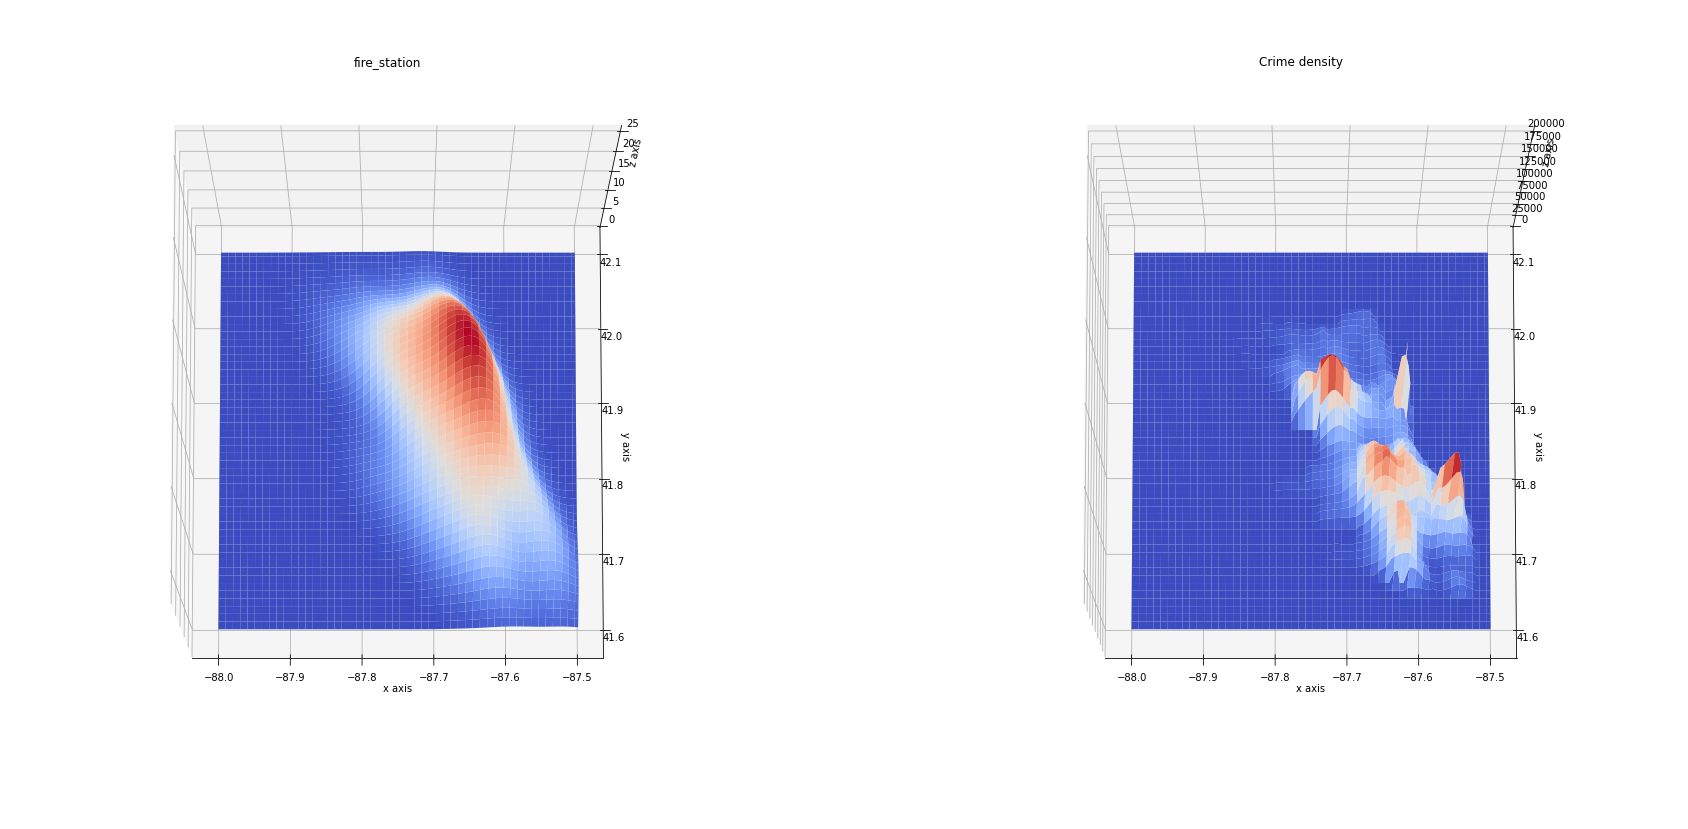

library


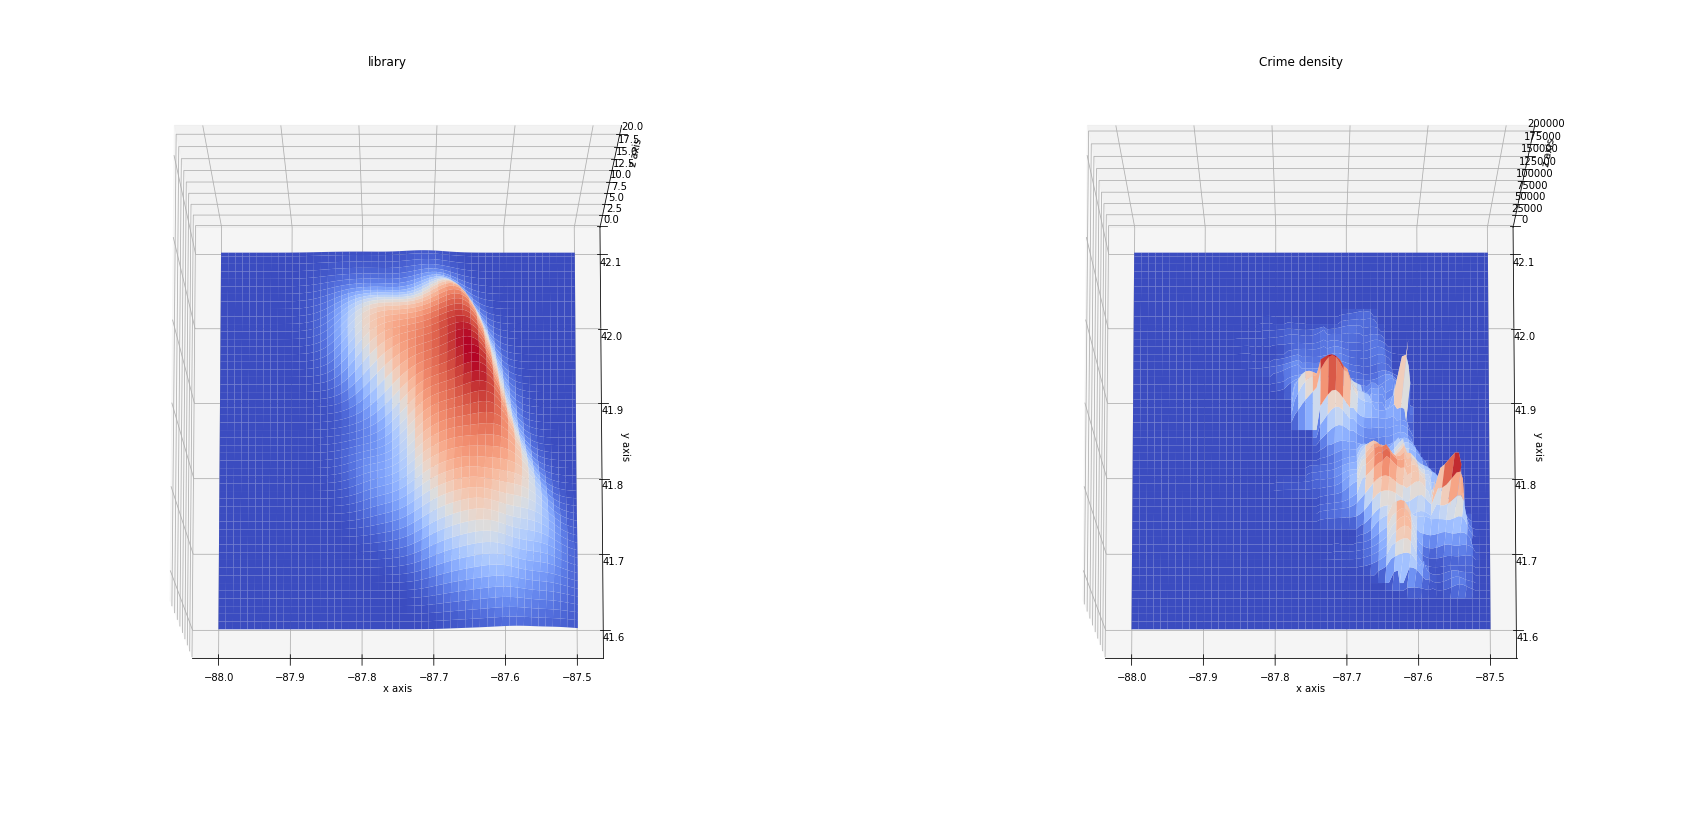

public_school


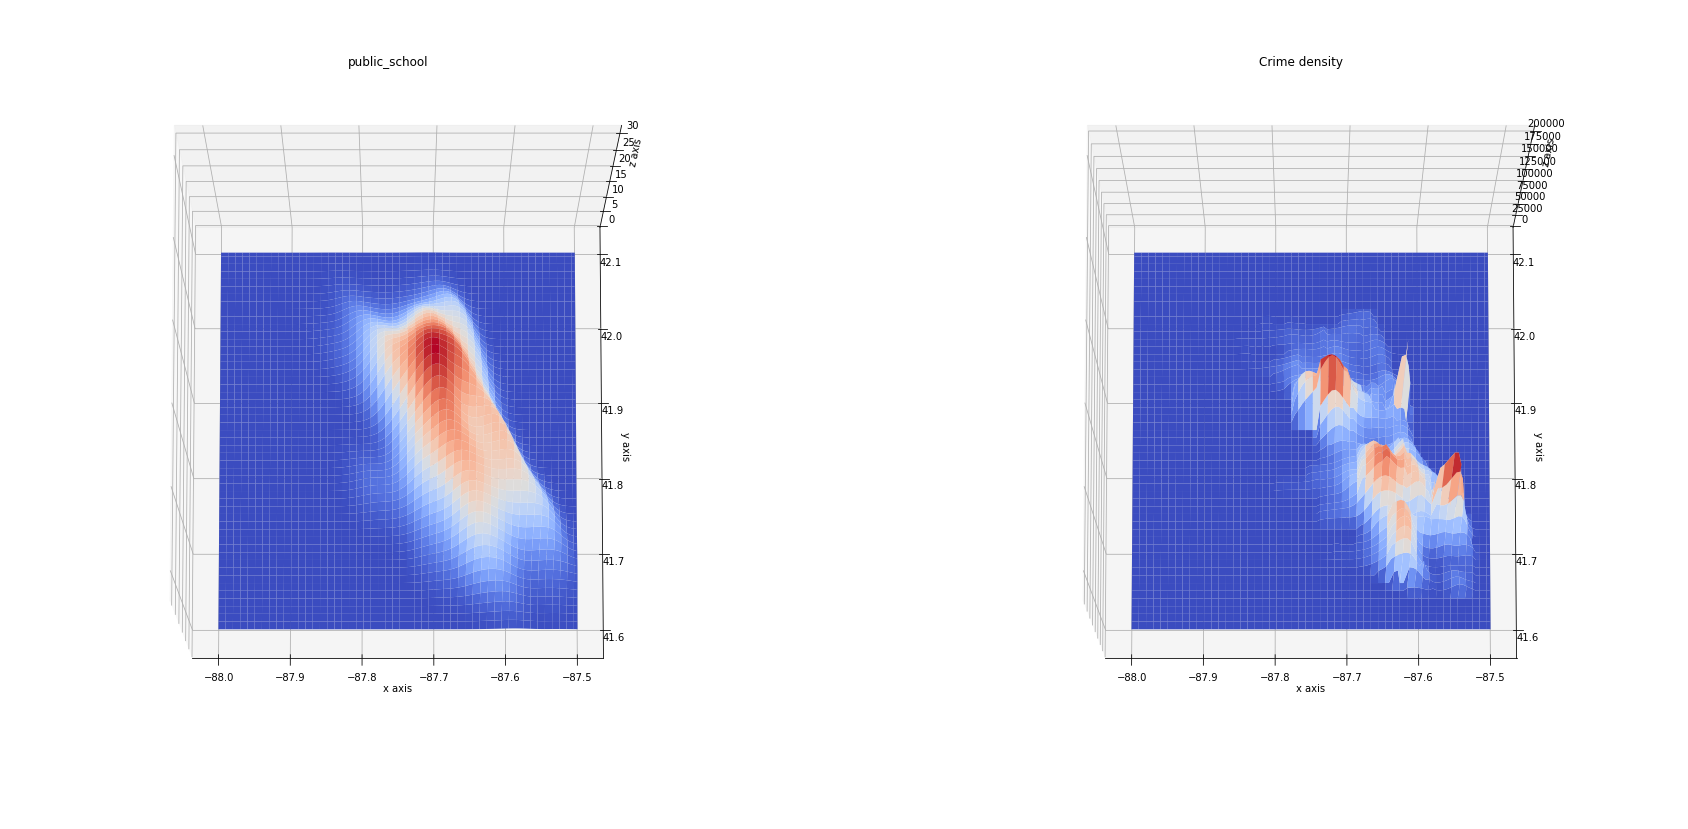

family_support


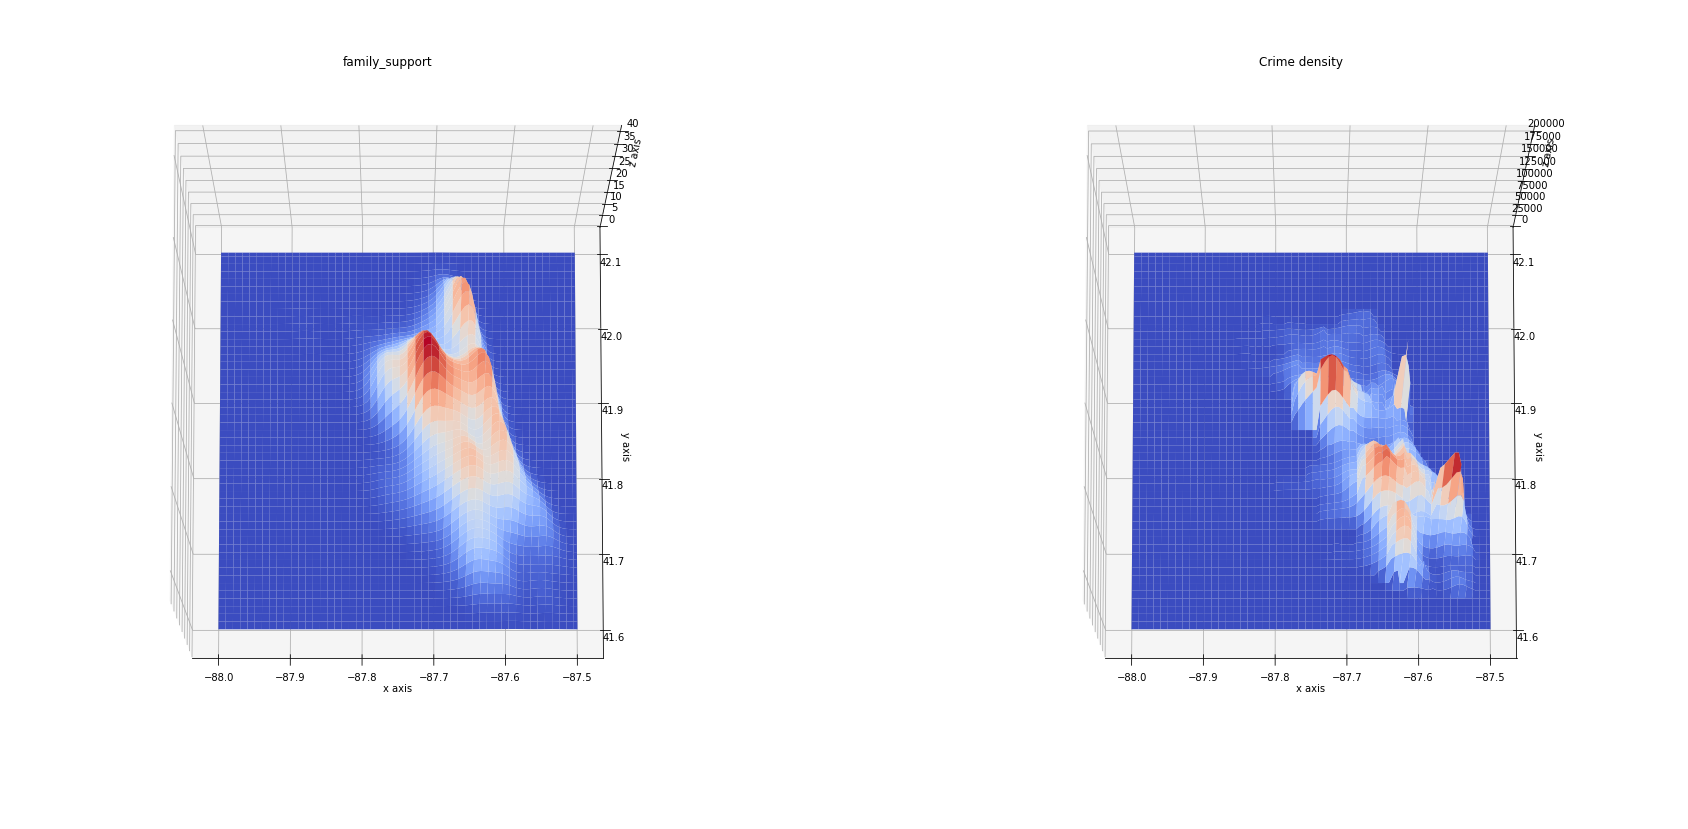

vacant_building


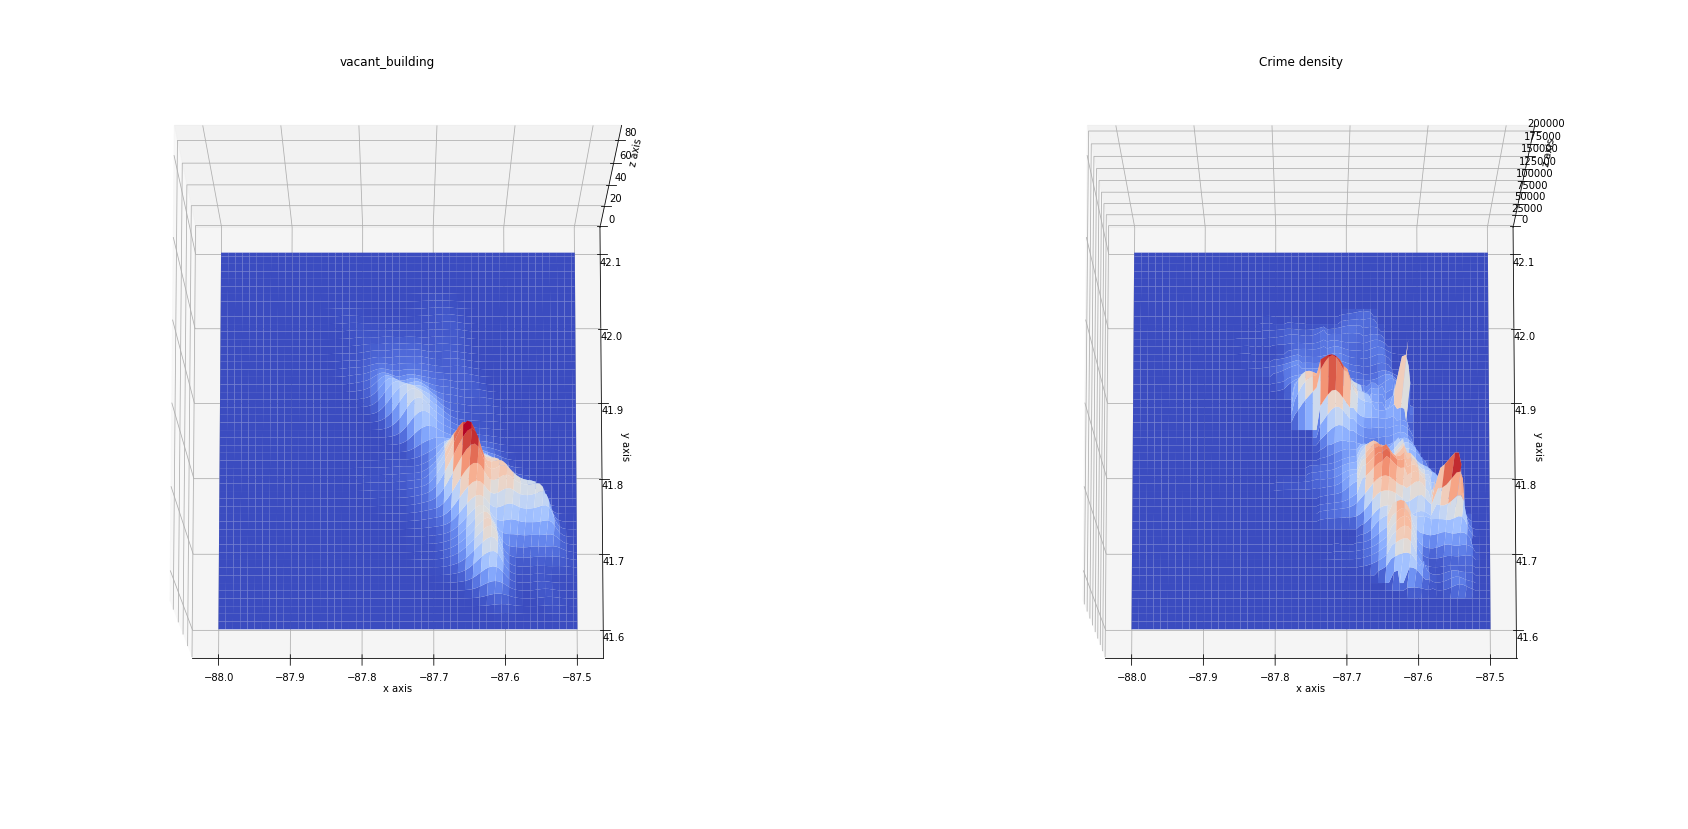

light_out


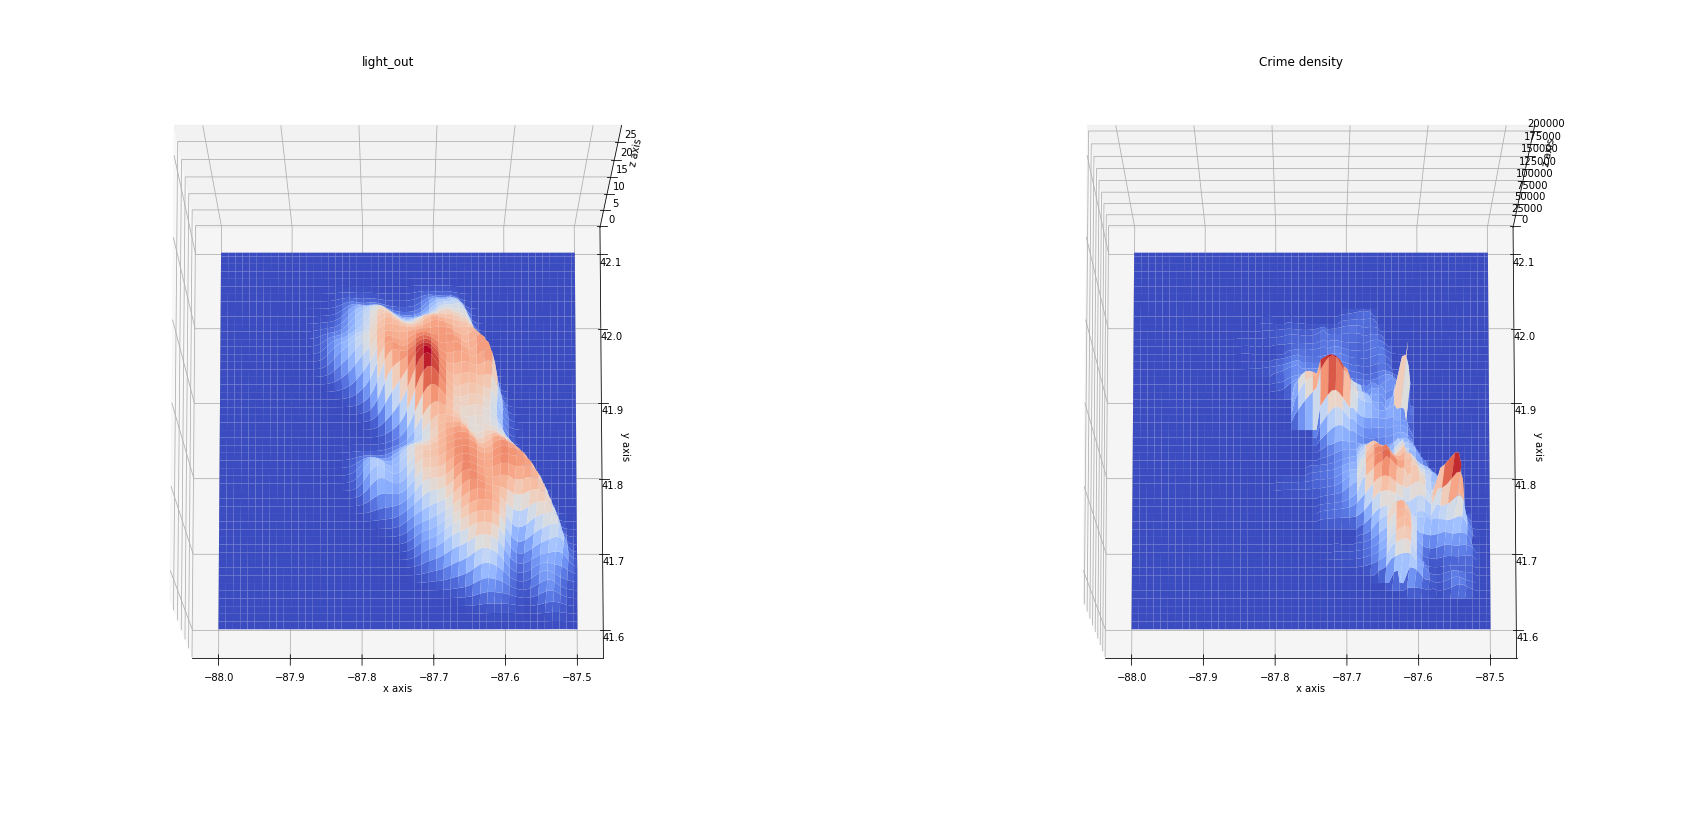

sanitation


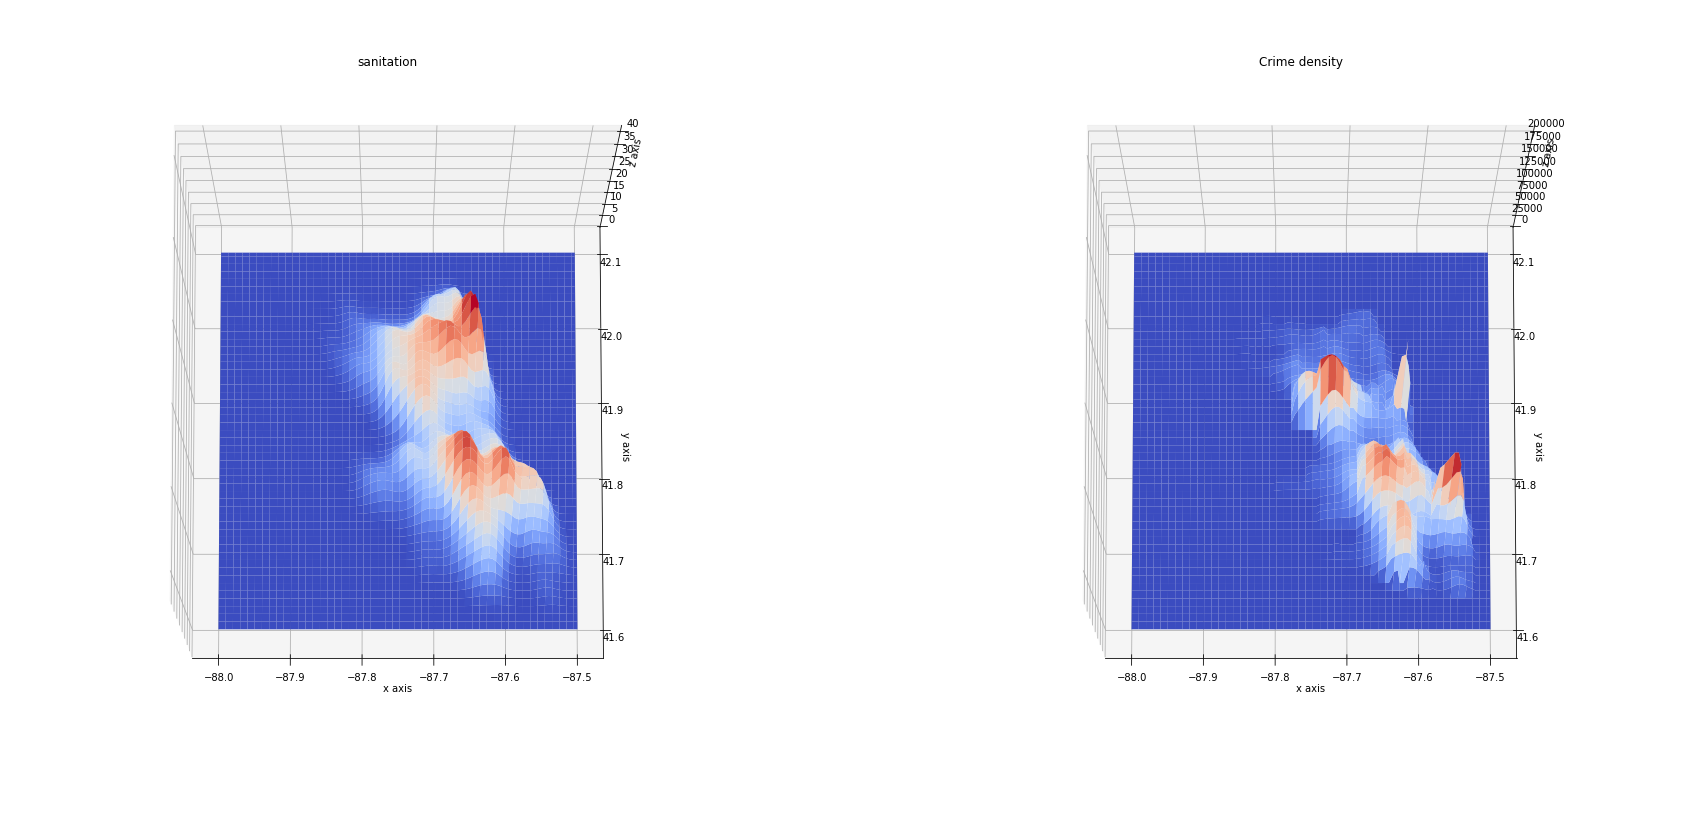

graffiti


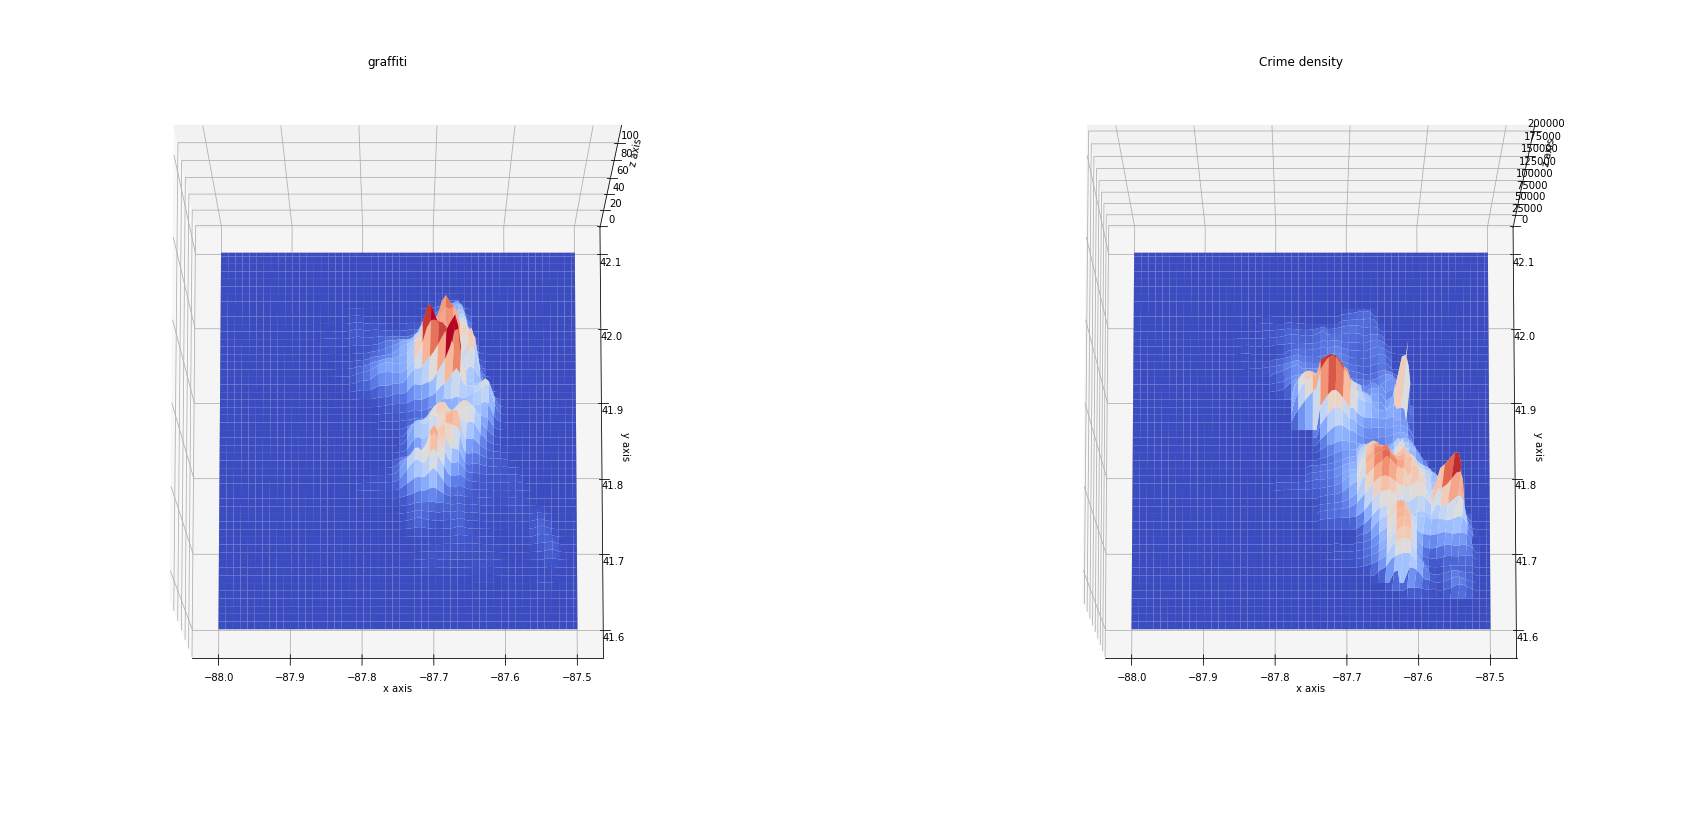

shotspotter


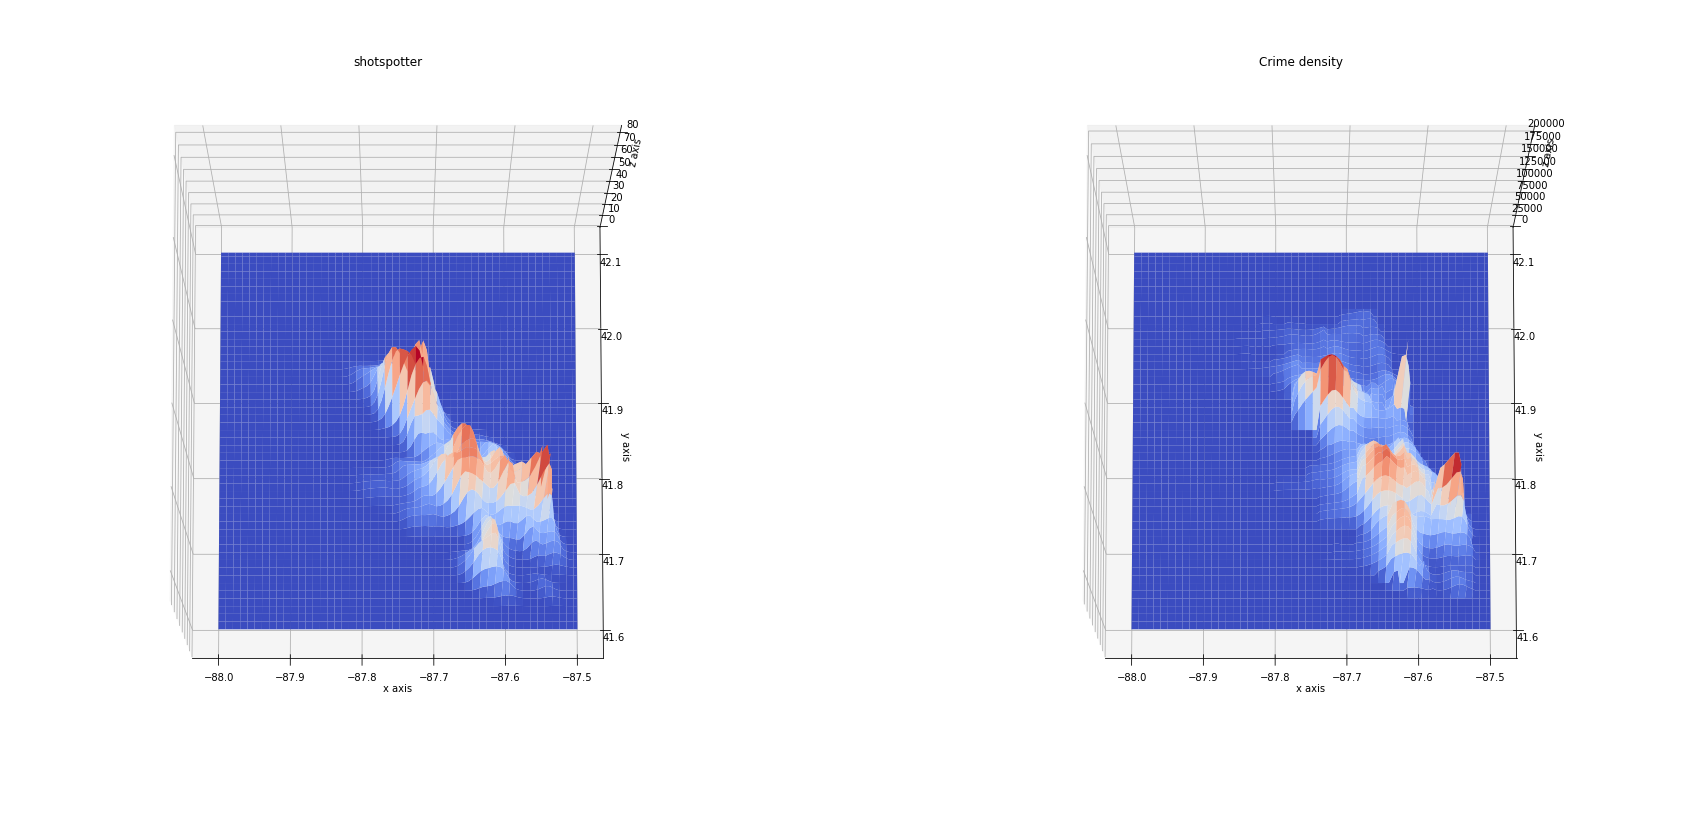

,bus,police_station,fire_station,library,public_school,family_support,vacant_building,light_out,sanitation,graffiti,shotspotter
0,3.000846e-59,5.007130e-40,7.601259e-37,1.572224e-29,1.781261e-67,1.490490e-105,7.445251e-238,7.929555e-162,2.588890e-190,0.000000e+00,0.0
1,1.607118e-57,1.804862e-39,3.294329e-36,4.980342e-29,3.212863e-66,5.227709e-104,4.742492e-233,1.162297e-158,6.137495e-187,0.000000e+00,0.0
2,7.904322e-56,6.424535e-39,1.400348e-35,1.551654e-28,5.557234e-65,1.746395e-102,2.630048e-228,1.530494e-155,1.299761e-183,0.000000e+00,0.0
3,3.570229e-54,2.258274e-38,5.838379e-35,4.754693e-28,9.217790e-64,5.556682e-101,1.269453e-223,1.810475e-152,2.458845e-180,0.000000e+00,0.0
4,1.480962e-52,7.838715e-38,2.387460e-34,1.432989e-27,1.466211e-62,1.683933e-99,5.331068e-219,1.923982e-149,4.155216e-177,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.854693e-57,4.223866e-13,4.052220e-16,2.453302e-13,2.566042e-33,9.858333e-44,1.324588e-89,1.266058e-72,1.107719e-89,1.966445e-194,0.0
9996,5.395920e-58,2.182881e-13,1.702151e-16,1.177530e-13,4.198519e-34,1.174166e-44,2.552835e-92,1.680345e-74,9.965460e-92,2.433319e-198,0.0
9997,3.406774e-59,1.115264e-13,7.022442e-17,5.564371e-14,6.617553e-35,1.360876e-45,4.260562e-95,2.005527e-76,8.065908e-94,2.269942e-202,0.0
9998,1.976632e-60,5.632827e-14,2.844977e-17,2.588426e-14,1.004295e-35,1.536001e-46,6.157369e-98,2.152378e-78,5.869842e-96,1.596335e-206,0.0


In [ ]:
xmin = -88
xmax = -87.5
ymin = 41.6
ymax = 42.1

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

column_name = ['bus','police_station','fire_station','library','public_school','family_support','vacant_building','light_out','sanitation','graffiti','shotspotter']
facility_service_collection = [bus_station_location,police_station_location, fire_station_location,\
                               library_location, public_school_location,\
                               family_support_location, vacant_data_location, light_out_data_location,\
                               sanitation_data_location, graffiti_data_location, shotspotter_data_location]

density_data =[]

for safety_factor, name in zip(facility_service_collection,column_name):
  print(name)
  data = pd.DataFrame(safety_factor)
  longitude = safety_factor['longitude']
  latitude = safety_factor['latitude']
  values = np.vstack([longitude,latitude])
  kernel = stats.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  density_data.append(np.squeeze((np.reshape(f,(10000,1)))).T)

  fig = plt.figure(figsize=(30,15))
  ax =  fig.add_subplot(1, 2, 1, projection='3d')

  ax.view_init(elev=80, azim=270)

  surf = ax.plot_surface(xx,yy,f,rstride=2,cstride=2,cmap=plt.cm.coolwarm,linewidth=0.5,antialiased=True)
  ax.set_xlabel('x axis')
  ax.set_ylabel('y axis')
  ax.set_zlabel('z axis')
  plt.title(name)

  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.view_init(elev=80, azim=270)
  surf = ax.plot_surface(xx,yy,np.reshape(list(crime_density), xx.shape),rstride=2,cstride=2,cmap=plt.cm.coolwarm,linewidth=0.5,antialiased=True)
  ax.set_xlabel('x axis')
  ax.set_ylabel('y axis')
  ax.set_zlabel('z axis')
  plt.title('Crime density')
  plt.show()

pd_density = pd.DataFrame(density_data).T
pd_density.columns=column_name
pd_density





# 5. Calcualate correlation and plot about it

In [ ]:
data_list = []
data_list.append(np.squeeze((np.reshape(xx,(10000,1)))).T)
data_list.append(np.squeeze((np.reshape(yy,(10000,1)))).T)
data_list.append(list(crime_density))
crime_density_pd = pd.DataFrame(data_list).T
crime_density_pd.columns = ['longitude','latitude','adjust_crime_density']


In [ ]:
density_data_total = pd.concat([crime_density_pd,pd_density],axis=1)
density_data_total

,longitude,latitude,adjust_crime_density,bus,police_station,fire_station,library,public_school,family_support,vacant_building,light_out,sanitation,graffiti,shotspotter
0,-88.0,41.600000,0.0,3.000846e-59,5.007130e-40,7.601259e-37,1.572224e-29,1.781261e-67,1.490490e-105,7.445251e-238,7.929555e-162,2.588890e-190,0.000000e+00,0.0
1,-88.0,41.605051,0.0,1.607118e-57,1.804862e-39,3.294329e-36,4.980342e-29,3.212863e-66,5.227709e-104,4.742492e-233,1.162297e-158,6.137495e-187,0.000000e+00,0.0
2,-88.0,41.610101,0.0,7.904322e-56,6.424535e-39,1.400348e-35,1.551654e-28,5.557234e-65,1.746395e-102,2.630048e-228,1.530494e-155,1.299761e-183,0.000000e+00,0.0
3,-88.0,41.615152,0.0,3.570229e-54,2.258274e-38,5.838379e-35,4.754693e-28,9.217790e-64,5.556682e-101,1.269453e-223,1.810475e-152,2.458845e-180,0.000000e+00,0.0
4,-88.0,41.620202,0.0,1.480962e-52,7.838715e-38,2.387460e-34,1.432989e-27,1.466211e-62,1.683933e-99,5.331068e-219,1.923982e-149,4.155216e-177,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-87.5,42.079798,0.0,7.854693e-57,4.223866e-13,4.052220e-16,2.453302e-13,2.566042e-33,9.858333e-44,1.324588e-89,1.266058e-72,1.107719e-89,1.966445e-194,0.0
9996,-87.5,42.084848,0.0,5.395920e-58,2.182881e-13,1.702151e-16,1.177530e-13,4.198519e-34,1.174166e-44,2.552835e-92,1.680345e-74,9.965460e-92,2.433319e-198,0.0
9997,-87.5,42.089899,0.0,3.406774e-59,1.115264e-13,7.022442e-17,5.564371e-14,6.617553e-35,1.360876e-45,4.260562e-95,2.005527e-76,8.065908e-94,2.269942e-202,0.0
9998,-87.5,42.094949,0.0,1.976632e-60,5.632827e-14,2.844977e-17,2.588426e-14,1.004295e-35,1.536001e-46,6.157369e-98,2.152378e-78,5.869842e-96,1.596335e-206,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


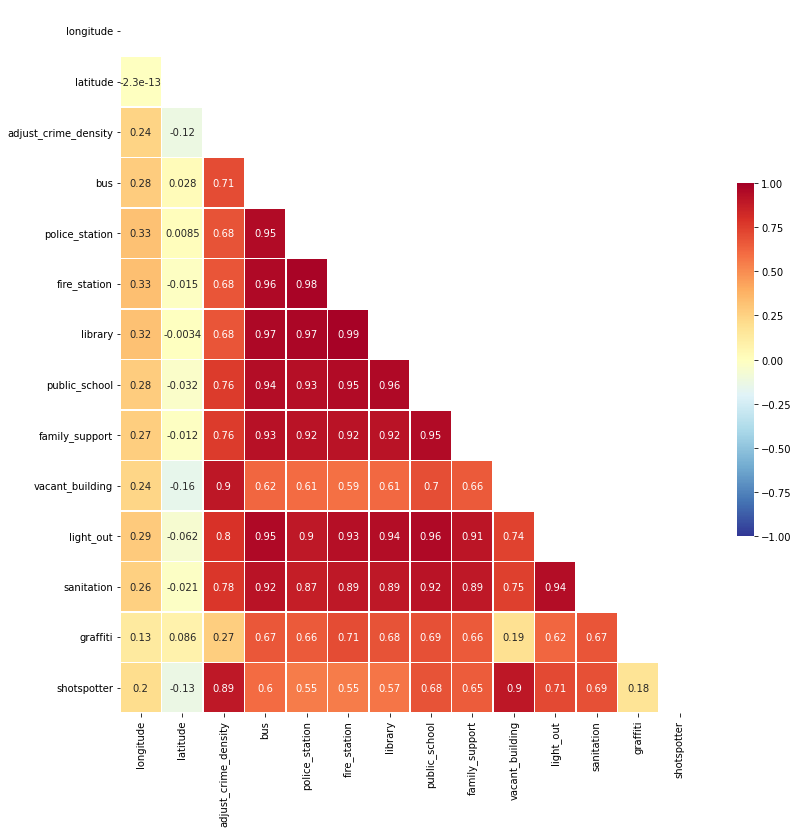

In [ ]:
import seaborn as sns

df = density_data_total.corr()
fig, ax = plt.subplots( figsize=(13,13) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,  
            mask=mask,    
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [ ]:
density_data_total.to_csv(os.path.join(RESULT_PATH,'violent_population_k.csv'),index=False)

In [ ]:
chicago_polygon = pd.read_csv(os.path.join(JW_PATH,'chicago_zipcode_polygon.csv'))
chicago_location = chicago_polygon[['the_geom','ZIP','SHAPE_AREA']]
vectors_list = []
count = 0
for vector_set in chicago_polygon['the_geom']:
  tmp = []
  vector_set = vector_set.replace("(","")
  vector_set = vector_set.replace(")","")
  for index, vector in enumerate(vector_set[13:].split(",")):
    if index == 0:
      longitude = vector.split(" ")[0]
      latitude = vector.split(" ")[1]
      tmp.append([float(longitude), float(latitude)])
    else:

      longitude = vector.split(" ")[1]
      latitude = vector.split(" ")[2]
      tmp.append([float(longitude), float(latitude)])

    
  count += 1
  vectors_list.append(tmp)

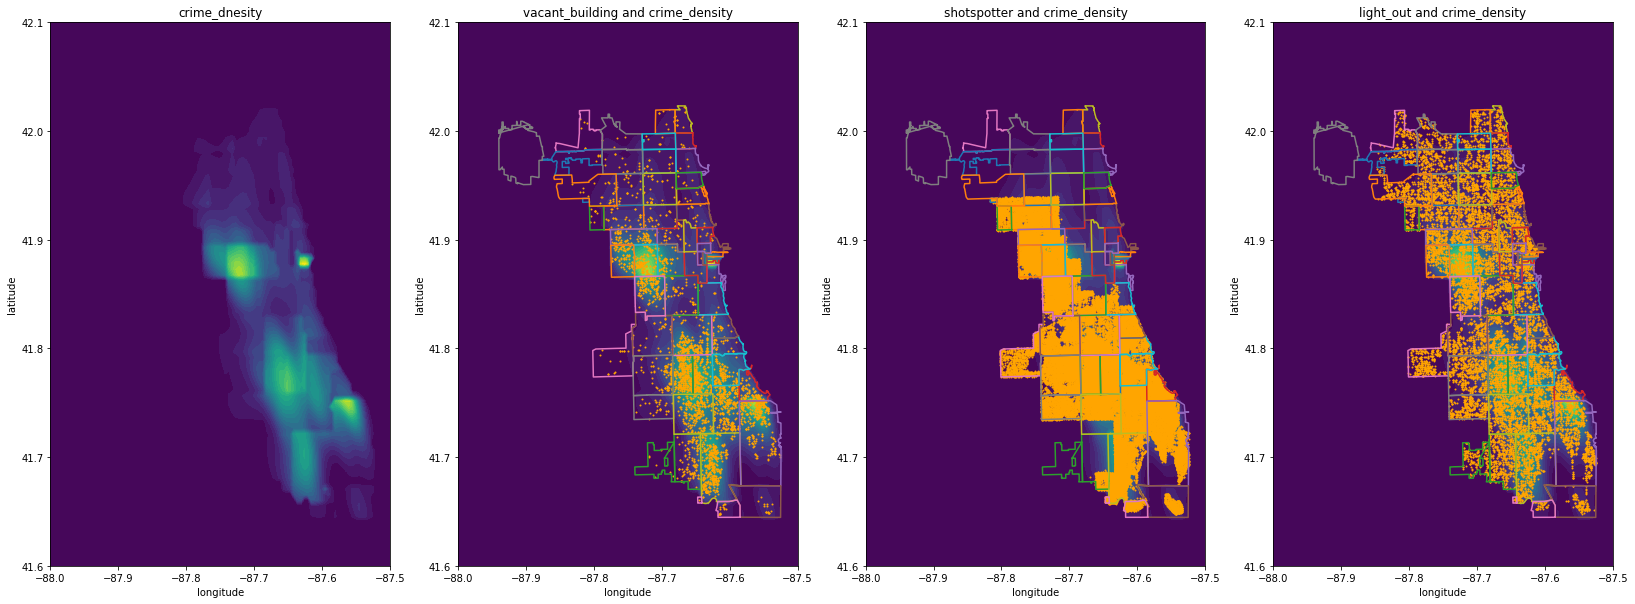

In [ ]:
top_3 = ['', 'vacant_building','shotspotter','light_out']
top_3_data = [np.nan,vacant_data_location, shotspotter_data_location,light_out_data_location]

fig = plt.figure(figsize=(28,10))
number = 1
for data, name in zip(top_3_data, top_3):
  fig.add_subplot(1, 4, number)
  plt.contourf(xx,yy,np.reshape(list(crime_density),xx.shape),25)
  if number != 1:
    plt.scatter(data['longitude'],data['latitude'],c='orange',s=1,edgecolors='orange')
    for i in range(60):
      xs, ys = zip(*vectors_list[i])
      plt.plot(xs,ys) 

  if number != 1:
    plt.title(name + ' and crime_density')
  else:
    plt.title('crime_dnesity')
  plt.ylabel("latitude")
  plt.xlabel("longitude")
  number += 1

In [ ]:
density_data_total = pd.read_csv(os.path.join(RESULT_PATH,'violent_population_k.csv'))

In [ ]:
density_data_total.corr()['adjust_crime_density']

longitude               0.244528
latitude               -0.119085
adjust_crime_density    1.000000
bus                     0.709735
police_station          0.681847
fire_station            0.675213
library                 0.677859
public_school           0.764232
family_support          0.761160
vacant_building         0.903040
light_out               0.795204
sanitation              0.776180
graffiti                0.268436
shotspotter             0.894577
Name: adjust_crime_density, dtype: float64